In [1]:
# Importing dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Importing CSV
df = pd.read_csv('Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,47,Personal Travel,Eco,50,4,2,4,...,3,3,4,1,3,2,4,3,0,0.0
1,satisfied,Female,Loyal Customer,55,Personal Travel,Eco Plus,50,4,4,4,...,5,5,3,4,3,4,4,5,0,0.0
2,satisfied,Female,Loyal Customer,59,Personal Travel,Eco,50,4,5,5,...,4,4,4,4,5,5,4,4,0,3.0
3,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,50,1,1,1,...,4,4,3,3,4,3,5,4,0,0.0
4,satisfied,Female,Loyal Customer,63,Personal Travel,Eco,50,4,3,3,...,4,4,4,4,4,3,4,2,0,0.0


In [3]:
# Filtering dataframe for Loyal Customer
data = df[(df["Customer Type"]=="Loyal Customer")]
data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,47,Personal Travel,Eco,50,4,2,4,...,3,3,4,1,3,2,4,3,0,0.0
1,satisfied,Female,Loyal Customer,55,Personal Travel,Eco Plus,50,4,4,4,...,5,5,3,4,3,4,4,5,0,0.0
2,satisfied,Female,Loyal Customer,59,Personal Travel,Eco,50,4,5,5,...,4,4,4,4,5,5,4,4,0,3.0
3,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,50,1,1,1,...,4,4,3,3,4,3,5,4,0,0.0
4,satisfied,Female,Loyal Customer,63,Personal Travel,Eco,50,4,3,3,...,4,4,4,4,4,3,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119605,dissatisfied,Female,Loyal Customer,29,Personal Travel,Eco,6907,2,4,2,...,4,2,2,4,4,4,3,4,6,0.0
119606,satisfied,Male,Loyal Customer,44,Business travel,Business,6907,5,5,5,...,4,3,2,3,4,4,4,4,0,0.0
119607,dissatisfied,Female,Loyal Customer,57,Personal Travel,Eco,6924,3,4,3,...,3,3,1,5,1,3,3,3,12,17.0
119608,satisfied,Female,Loyal Customer,45,Business travel,Business,6948,1,1,1,...,1,3,3,5,4,1,3,1,0,13.0


In [4]:
# Creating new dataframe from the filtered dataframe and dropping all demographic data
newdf = data.drop(["satisfaction", "Gender", "Customer Type", "Age", "Type of Travel","Class", "Flight Distance" ], axis=1)
feature_names = newdf.columns
newdf.head()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,4,2,4,3,3,4,3,3,4,1,3,2,4,3,0,0.0
1,4,4,4,2,5,4,5,5,3,4,3,4,4,5,0,0.0
2,4,5,5,5,4,4,4,4,4,4,5,5,4,4,0,3.0
3,1,1,1,1,4,4,4,4,3,3,4,3,5,4,0,0.0
4,4,3,3,3,3,1,4,4,4,4,4,3,4,2,0,0.0


In [5]:
# Assigning target (y variable)
target = data["satisfaction"]
target_names = ["satisfied", "dissatisfied"]

In [6]:
# Checking nulls
newdf.isnull().sum()

Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             302
dtype: int64

In [7]:
# Splitting the dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newdf, target, random_state=42)

In [8]:
# Importing imputer and training the dataset for nan values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)

In [9]:
X_test = imputer.transform(X_test)

In [10]:
feature_names
lst = list(feature_names)
lst

['Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [11]:
# Importing Logistic Regression module
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=4000000)
classifier

LogisticRegression(max_iter=4000000)

In [12]:
# Training the dataset
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=4000000)

In [13]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8467894051698945
Testing Data Score: 0.8418808527595139


In [14]:
# Testing the model
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
3294,satisfied,satisfied
83791,dissatisfied,dissatisfied
5651,dissatisfied,dissatisfied
6557,satisfied,satisfied
100060,dissatisfied,dissatisfied
...,...,...
76847,satisfied,satisfied
12340,dissatisfied,dissatisfied
96914,satisfied,satisfied
114533,dissatisfied,dissatisfied


In [15]:
# Checking feature importance
import eli5
eli5.show_weights(classifier, feature_names=lst)

Weight?,Feature
+0.829,Inflight entertainment
+0.430,Seat comfort
+0.415,On-board service
+0.381,Ease of Online booking
+0.360,Leg room service
+0.318,Checkin service
+0.263,Gate location
+0.224,Online support
+0.169,Online boarding
+0.165,Food and drink


<AxesSubplot:>

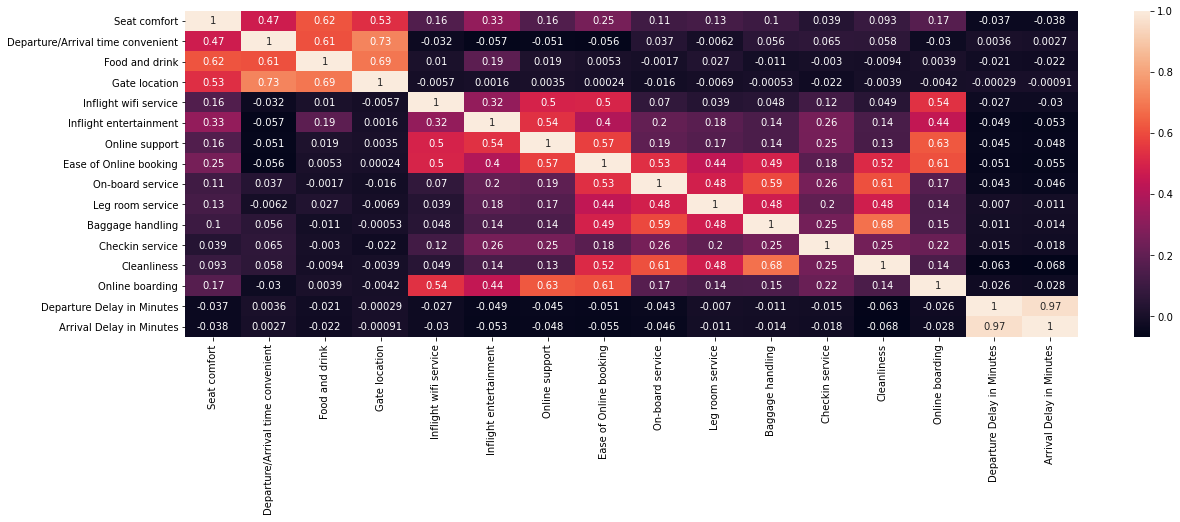

In [16]:
# Checking coorelation between variables
import seaborn as sns
cor = newdf.corr()
plt.figure(figsize = (20,6))
sns.heatmap(cor, annot=True)

In [17]:
# Creating a copy of the original dataset
improved = data.copy()
improved

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,47,Personal Travel,Eco,50,4,2,4,...,3,3,4,1,3,2,4,3,0,0.0
1,satisfied,Female,Loyal Customer,55,Personal Travel,Eco Plus,50,4,4,4,...,5,5,3,4,3,4,4,5,0,0.0
2,satisfied,Female,Loyal Customer,59,Personal Travel,Eco,50,4,5,5,...,4,4,4,4,5,5,4,4,0,3.0
3,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,50,1,1,1,...,4,4,3,3,4,3,5,4,0,0.0
4,satisfied,Female,Loyal Customer,63,Personal Travel,Eco,50,4,3,3,...,4,4,4,4,4,3,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119605,dissatisfied,Female,Loyal Customer,29,Personal Travel,Eco,6907,2,4,2,...,4,2,2,4,4,4,3,4,6,0.0
119606,satisfied,Male,Loyal Customer,44,Business travel,Business,6907,5,5,5,...,4,3,2,3,4,4,4,4,0,0.0
119607,dissatisfied,Female,Loyal Customer,57,Personal Travel,Eco,6924,3,4,3,...,3,3,1,5,1,3,3,3,12,17.0
119608,satisfied,Female,Loyal Customer,45,Business travel,Business,6948,1,1,1,...,1,3,3,5,4,1,3,1,0,13.0


In [18]:
# Improving the scores for the top 3 variables
improved['Inflight entertainment improved'] = np.where((improved['Inflight entertainment'] <= 3),  improved['Inflight entertainment']+1, improved['Inflight entertainment'])
improved['Seat comfort improved'] = np.where((improved['Seat comfort'] <= 3),  improved['Seat comfort']+1, improved['Seat comfort'])
improved['On-board service improved'] = np.where((improved['On-board service'] <= 3),  improved['On-board service']+1, improved['On-board service'])


In [19]:
#improved.to_csv("test.csv")
improved

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight entertainment improved,Seat comfort improved,On-board service improved
0,satisfied,Female,Loyal Customer,47,Personal Travel,Eco,50,4,2,4,...,1,3,2,4,3,0,0.0,4,4,4
1,satisfied,Female,Loyal Customer,55,Personal Travel,Eco Plus,50,4,4,4,...,4,3,4,4,5,0,0.0,4,4,4
2,satisfied,Female,Loyal Customer,59,Personal Travel,Eco,50,4,5,5,...,4,5,5,4,4,0,3.0,4,4,4
3,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,50,1,1,1,...,3,4,3,5,4,0,0.0,4,2,4
4,satisfied,Female,Loyal Customer,63,Personal Travel,Eco,50,4,3,3,...,4,4,3,4,2,0,0.0,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119605,dissatisfied,Female,Loyal Customer,29,Personal Travel,Eco,6907,2,4,2,...,4,4,4,3,4,6,0.0,4,3,3
119606,satisfied,Male,Loyal Customer,44,Business travel,Business,6907,5,5,5,...,3,4,4,4,4,0,0.0,4,5,3
119607,dissatisfied,Female,Loyal Customer,57,Personal Travel,Eco,6924,3,4,3,...,5,1,3,3,3,12,17.0,4,4,2
119608,satisfied,Female,Loyal Customer,45,Business travel,Business,6948,1,1,1,...,5,4,1,3,1,0,13.0,2,2,4


In [20]:
# Assigning the dependent variable
y_improved = improved["satisfaction"]

In [21]:
# Removing all demographic data and assigning to X variable
X_improved = improved.drop(["satisfaction", "Gender", "Customer Type", "Age", "Type of Travel","Class", "Flight Distance", "Inflight entertainment","Seat comfort", "On-board service" ], axis=1)

X_improved.head()

,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Online support,Ease of Online booking,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight entertainment improved,Seat comfort improved,On-board service improved
0,2,4,3,3,3,3,1,3,2,4,3,0,0.0,4,4,4
1,4,4,2,5,5,5,4,3,4,4,5,0,0.0,4,4,4
2,5,5,5,4,4,4,4,5,5,4,4,0,3.0,4,4,4
3,1,1,1,4,4,4,3,4,3,5,4,0,0.0,4,2,4
4,3,3,3,3,4,4,4,4,3,4,2,0,0.0,2,4,4


In [22]:
X_improved = imputer.transform(X_improved)

In [23]:
# Running the model on the improved scores
predictions = classifier.predict(X_improved)
predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_improved})
predictions

,Prediction,Actual
0,dissatisfied,satisfied
1,satisfied,satisfied
2,satisfied,satisfied
3,satisfied,satisfied
4,dissatisfied,satisfied
...,...,...
119605,satisfied,dissatisfied
119606,dissatisfied,satisfied
119607,satisfied,dissatisfied
119608,dissatisfied,satisfied


In [24]:
# Saving the predictions as CSV
predictions.to_csv("loyal_improved_ratings.csv")